In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd 
from skimage.data import imread
import matplotlib.pyplot as plt
import cv2
from rbox.data_utils import *

In [3]:
import os
print(os.listdir("input"))

['.DS_Store', 'non_empty_ship_segmentations.csv', 'sample_submission.csv', 'train', 'train_empty_img_id.npy', 'train_non_empty_img_id.npy', 'train_ship_segmentations.csv', 'train_ship_segmentations_bbox.csv', 'val_empty_img_id.npy', 'val_non_empty_img_id.npy']


In [22]:
train = os.listdir('input/train')
print(len(train))

test = os.listdir('input/test')
print(len(test))

104070
88500


In [302]:
submission = pd.read_csv('input/sample_submission.csv')
submission.head()

,ImageId,EncodedPixels
0,0001124c7.jpg,1 2
1,000194a2d.jpg,1 2
2,0001b1832.jpg,1 2
3,00052ed46.jpg,1 2
4,000532683.jpg,1 2


In [3]:
masks = pd.read_csv('input/train_ship_segmentations_bbox.csv')
masks.head(100)

,ImageId,EncodedPixels,x,y,w,h,a
0,00003e153.jpg,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,395.367767,482.503876,102.779083,33.015137,-1.684684
2,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...,148.999985,746.499939,36.610214,11.371354,-33.690067
3,00021ddc3.jpg,95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...,128.769241,760.153809,11.648705,7.211102,-33.690063
4,00021ddc3.jpg,74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...,100.989998,717.069946,3.535534,10.465181,-81.869896
5,00021ddc3.jpg,150423 2 151190 3 151958 3 152726 4 153495 3 1...,197.500000,662.500000,5.000000,3.000000,-0.000000
6,00021ddc3.jpg,139644 2 140408 6 141174 9 141942 9 142711 6 1...,183.499985,633.000061,8.003675,3.880570,-75.963760
7,00021ddc3.jpg,86727 2 87493 4 88261 4 89030 3 89798 4 90566 ...,115.941193,710.235352,3.395499,7.761139,-75.963760
8,00021ddc3.jpg,74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...,103.436012,712.852051,4.919350,14.936936,-79.695152
9,00021ddc3.jpg,75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...,104.432426,707.905457,4.931970,12.987520,-80.537674


In [34]:
masks['EncodedPixels'].isnull().sum()*100.0/len(masks.ImageId.unique())

72.06687806284232

In [31]:
len(masks.ImageId.unique()), masks['EncodedPixels'].isnull().sum()

(104070, 75000)

In [28]:
all_empty = masks[masks['EncodedPixels'].isnull()]
all_non_empty = masks[~masks['EncodedPixels'].isnull()]
len(all_empty), len(all_non_empty), len(masks)

(75000, 56030, 131030)

In [62]:
all_non_empty.to_csv('input/non_empty_ship_segmentations.csv')

In [86]:
empty_img = all_empty.ImageId.unique()
non_empty_img = all_non_empty.ImageId.unique()
len(empty_img), len(non_empty_img)

(75000, 29070)

In [102]:
#val_non_empty_img_id = np.random.choice(non_empty_img, len(non_empty_img)/10, replace=False)
#val_empty_img_id = np.random.choice(empty_img, len(empty_img)/10, replace=False)
 
#train_non_empty_img_id = set(non_empty_img) - set(val_non_empty_img_id)
#train_empty_img_id = set(empty_img) - set(val_empty_img_id)

np.save('input/val_non_empty_img_id.npy', np.array(list(val_non_empty_img_id)))
np.save('input/val_empty_img_id.npy', np.array(list(val_empty_img_id)))
np.save('input/train_non_empty_img_id.npy', np.array(list(train_non_empty_img_id)))
np.save('input/train_empty_img_id.npy', np.array(list(train_empty_img_id)))


In [99]:
len(val_non_empty_img_id), len(train_non_empty_img_id), len(val_non_empty_img_id)+ len(train_non_empty_img_id), \
len(val_empty_img_id) , len(train_empty_img_id), len(val_empty_img_id) + len(train_empty_img_id)

(2907, 26163, 29070, 7500, 67500, 75000)

In [67]:
29070.0/(75000 + 29070)

0.27933121937157684

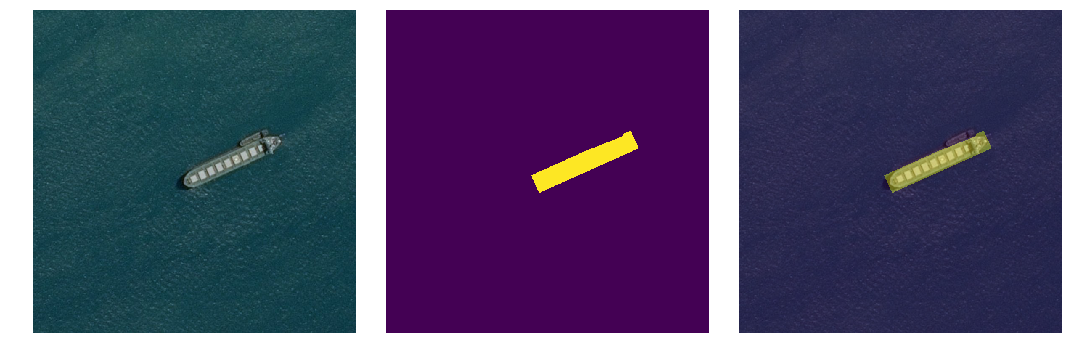

In [4]:
ImageId = '002fdcf51.jpg'

img = imread('input/train/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

# Take the individual ship masks and create a single mask array for all ships
all_masks = full_rle_decode([img_masks[1]], (768, 768))

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

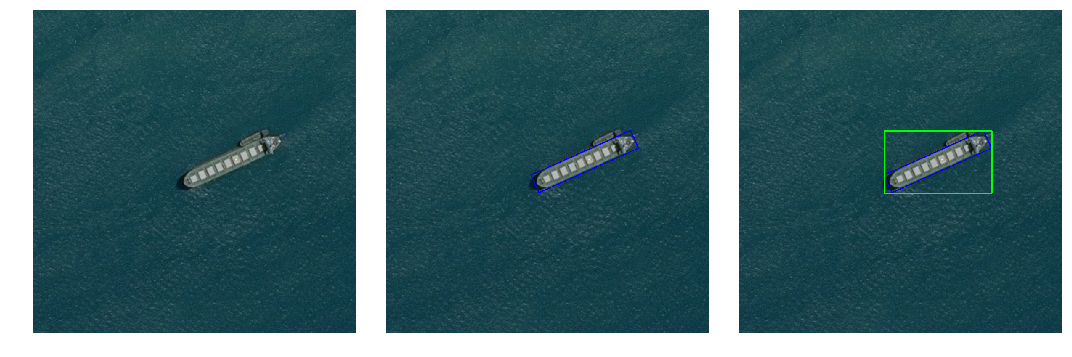

In [6]:
all_masks_img = all_masks
all_masks_img = all_masks_img.astype(np.uint8)

x,y,w,h = cv2.boundingRect(all_masks_img)
rect1 = cv2.rectangle(img.copy(),(x,y),(x+w,y+h),(0,255,0),2)

_,contours,_ = cv2.findContours(all_masks_img, 1, 1)
rect = cv2.minAreaRect(contours[0])
(x,y),(w,h), a = rect
box = cv2.boxPoints(rect)
box = np.int0(box)
rect2 = cv2.drawContours(img.copy(),[box],0,(0,0,255),2)
'''
rows,cols = all_masks_img.shape
M = cv2.getRotationMatrix2D((x,y),(180 + a)%180,1)
dst = cv2.warpAffine(all_masks_img, M, (rows,cols))
#x,y,w,h = cv2.boundingRect(dst)
#rect3 = cv2.rectangle(rect2.copy(),(x,y),(x+w,y+h),(0,255,0),2)

_,contours,_ = cv2.findContours(dst, 1, 1)
rect = cv2.minAreaRect(contours[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
rect3 = cv2.drawContours(rect2.copy(),[box],0,(0,0,255),2)
''' 
#x,y,w,h = np.int0([x,y,w,h])
#rect3 = cv2.rectangle(rect2.copy(),(x-w/2,y-h/2),(x+w/2,y+h/2),(0,255,0),2)

x,y,w,h = cv2.boundingRect(all_masks_img)
rect3 = cv2.rectangle(rect2.copy(),(x,y),(x+w,y+h),(0,255,0),2)


fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(rect2)
axarr[2].imshow(rect3)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

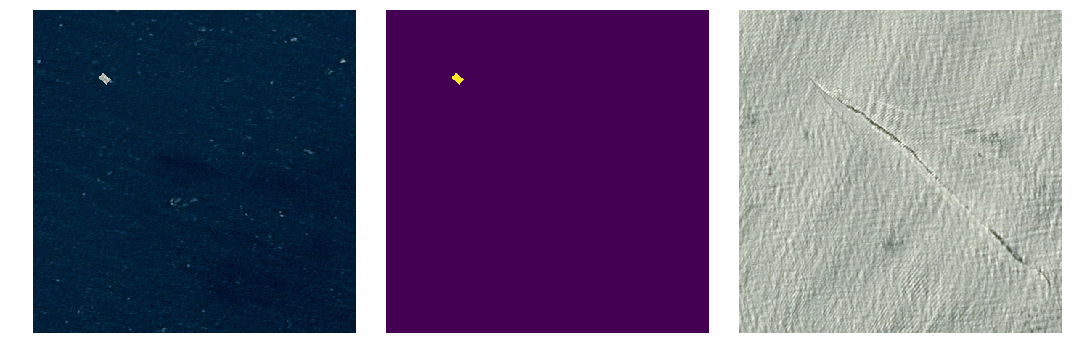

In [81]:
ImageId = 'ccc5df19d.jpg'

img = imread('input/train/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

ImageId_ne = 'fff67c31a.jpg'

img_ne = imread('input/train/' + ImageId_ne)
img_masks_ne = masks.loc[masks['ImageId'] == ImageId_ne, 'EncodedPixels'].tolist()

# Take the individual ship masks and create a single mask array for all ships
all_masks = full_rle_decode(img_masks_ne, (768, 768))

for i in range(768):
    for j in range(768):
        if all_masks[i,j] == 1:
            img[i, j] = img_ne[i, j]

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img_ne)
#axarr[2].imshow(img_masks_ne, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

In [70]:
non_empty_img

array(['000155de5.jpg', '00021ddc3.jpg', '0002756f7.jpg', ...,
       'fff529a0e.jpg', 'fff67c31a.jpg', 'fff77c602.jpg'], dtype=object)

In [107]:
60/4

15